# Data Mining - Lab 1
### Team 2 - Patricia Goresen, Jeffrey Lancon, Brychan Manry, George Sturrock
#### May 27, 2018
------

## Business Understanding

Since its inception, statistical data analysis has been an integral part of the game.  Coaches, players, and baseball fans can
recite many of these stats and often use them in coaching and team roster development decisions.  Books and movies have been based on the pursuit of utilizing baseball statistics to build the ultimate baseball team. They have even coined the term Sabermetrics: The empirical analysis of baseball, especially baseball statistics that measure in-game activity.

The book; Moneyball: The Art of Winning an Unfair Game by Michael Lewis and a film based on the book, staring Brad Pitt and Jonah Hill, are about Billy Bean, General Manager of the Oakland Athletics who focuses on player/team Sabermetrics to assemble a competitive baseball team using limited funding during the 2002 and 2003 seasons. Billy Bean was able to field a competitive team with a salary budget of less than half of their larger markets competitors, by focusing on hiring undervalued players.  Despite the salary roadblock, the Athletics made the playoffs in 2002 & 2003.

The source of baseball data for this lab is the Sean Lahman Baseball Database [
http://www.seanlahman.com/baseball-archive/statistics/].  Often cited as the most complete baseball database, the data set includes twenty-seven data tables and millions of records covering most non-proprietary baseball data pertaining to offense, fielding, pitching, payroll, player demographics, team statistics, manager data and much more.  For this lab, the focus will be on team level data.  The team level data will be explored using graphical analysis using standard python libraries.  After data exploration is complete, statistical methods can be employed to determine variable correlation and/or outcome prediction using techniques such as principle component analysis (PCA) or logistic regression.  Predictive models will be verified to assure the output is useful.  For example, a logistic regression model will have its assumptions validated, competing models will be compared using best practice measurements such as Area Under the Curve (AUC), Specificity, Sensitivity and Misclassification Scores.  The outcomes of this study could provide helpful insights for baseball fans who play fantasy sports, baseball reporters and baseball managers to assist with building a more competitive team.

------

## Data Types and Meaning

The base team data from the Lahman baseball database contains forty-eight different attributes. The team level data begins with the 1871 season and contains team level data through the conclusion of the 2017 major league baseball season. The grain of the team data is at the season and team level. The attributes can be divided into four general categories: informational, offense, batting and pitching. Informational attributes are descriptive elements about the team. These include unique team identifiers, league membership, division membership, post-season success indicators and home ballpark information. Conventional team offensive statistics such as total hits, at bats and home runs are also present. Team Pitching statistics such as earned run average (ERA), saves and strikeouts are available for analysis as well.

In [1]:
import pandas as pd
pd.read_csv("./docobjects/DataTypeandMeaning.csv")

,Attribute,Category,Type,DF_Type,Description
0,yearID,Informational,Interval,int64,The professional baseball season.
1,lgID,Informational,Nominal,object,The league to which the team was a member duri...
2,teamID,Informational,Nominal,object,Unique identifier for the professional basebal...
3,franchID,Informational,Nominal,object,Unique identifier for the professional basebal...
4,divID,Informational,Nominal,object,The division within the league to which the te...
5,Rank,Informational,Ordinal,int64,The team's finishing rank in their division fo...
6,G,Informational,Interval,int64,The number of games played by the team during ...
7,Ghome,Informational,Interval,float64,The number of home games played by the team du...
8,W,Informational,Interval,int64,Games won by the team during the year.
9,L,Informational,Interval,int64,Games lost by the team during the year.


------

## Data Quality

Overall, the team level data set is of high quality.  That being said, the data will be examined for missing values, unique identifiers, inconsistency between team names over time and any other anomalies which may arise.  The merger of the American and National Leagues, introduction of divisions, teams have gone out of business, new teams have been created, wild card playoffs, and evolving strategy makes data from approximately 150 years ago likely to be too dated (changed conditions) to be useful.  The data will be subset to only include those records from 1970 onwards. This date was chosen arbitrarily.  Data quality analysis will be conducted on this subset of the team data.  

_ Special Notation: _

1981: An MLB player’s strike in 1981 resulted in a shortened baseball season (±104 games).  There was postseason play that year.  

1994:  Because of another MLB player’s strike in 1994, the season ended prematurely. There was no postseason play that year.  

For both years, statistics for these years may appear to be outliers but are in fact actual results.

### Data Integrity

In an effort to confirm that the data contained within the Lahman's baseball dataset was indeed valid data, other historical baseball statistical data repositories were consulted to determine if the Lahman's datasets' values corresponded to these other datasets.

MLB datasets referenced were: a) MLB.com official dataset and b) Baseball-Reference.com MLB dataset.  While these dataset repositories did not contain all the same attributes, there were numerous attributes that were common to all dataset.  An excerpt from these datasets is included below.

A spot-check of the dataset was conducted using an arbitrary year (2009) and MLB teams (Arizona Diamondbacks, Chicago White Sox, Milwaukee Brewers, and San Francisco Giants.  The attributes that were common to all three data sources were compared.  As seen below, all 3 dataset’s attributes data were consistent.  This is strong evidence that the data within the Lahman’s dataset is valid.  


<center>LAHMAN'S BASEBALL DATASET - TEAMS.CSV  (2009 EXTRACT)</center>  

|franchID |	R |	AB |	H |	2B |	3B |	HR |	BB |	SO |	SB |	CS |	HBP |	SF |
|---------|---|----|------|----|-------|-------|-------|-------|-------|-------|-------|-------|
| ARI  |	720 |	5565 |	1408 |	307 |	45 |	173 |	571 |	1298 | 102 |	40 |	37 |	41 |
| CHW  |	724 |	5463 |	1410 |	246 |	20 |	184 |	534 |	1022 | 113 |	49 | 	62 |	39 |
| MIL  |	785 |	5510 |	1447 |	281 |	37 |	182 |	610 |	1231 |  68 |	37 |	71 |	47 |
| SFG  |	657 |	5493 |	1411 |	275 |	43 |	122 |	392 |	1158 |  78 |	28 |	50 |	55 |

<br>
<br>
 <center>MLB.COM BASEBALL DATASET - TEAM LEVEL STATISTICS  (2009 EXTRACT)</center>
 <center>Weblink:	https://goo.gl/LxFDxZ  <center>  
    
|Team     |	R   |	AB   |	H    |	 2B |	3B | 	 HR |	 BB |	  SO |	SB |	CS |	HBP |	SF |
|---------|---  |--------|-------|------|------|--------|-------|--------|-----|-------|--------|------|
| ARI     |	720 |	5565 |	1408 |	307 |	45 |	173 |	571 |	1298 | 102 |	40 |	 37 |	41 |
| CHW     |	724 |	5463 |	1410 |	246 |	20 |	184 |	534 |	1022 | 113 |	49 | 	 62 |	39 |
| MIL     |	785 |	5510 |	1447 |	281 |	37 |	182 |	610 |	1231 |  68 |	37 |	 71 |	47 |
| SFG     |	657 |	5493 |	1411 |	275 |	43 |	122 |	392 |	1158 |  78 |	28 |	 50 |	55 |

<br>
<br>
 <center>BASEBALL-REFERENCE.COM  MLB DATASET - TEAM LEVEL STATISTICS  (2009 EXTRACT)</center>
 <center>Weblink:	https://www.baseball-reference.com/leagues/MLB/2009.shtml  <center>  
    
|Team     |	R   |	AB   |	H    |	 2B |	3B | 	 HR |	 BB |	  SO |	SB |	CS |	HBP |	SF |
|---------|---  |--------|-------|------|------|--------|-------|--------|-----|-------|--------|------|
| ARI     |	720 |	5565 |	1408 |	307 |	45 |	173 |	571 |	1298 | 102 |	40 |	 37 |	41 |
| CHW     |	724 |	5463 |	1410 |	246 |	20 |	184 |	534 |	1022 | 113 |	49 | 	 62 |	39 |
| MIL     |	785 |	5510 |	1447 |	281 |	37 |	182 |	610 |	1231 |  68 |	37 |	 71 |	47 |
| SFG     |	657 |	5493 |	1411 |	275 |	43 |	122 |	392 |	1158 |  78 |	28 |	 50 |	55 |

 

In [2]:
import numpy as np
import os
import string
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Read Teams data file
teams = pd.read_csv('./sourcedata/Teams.csv')
#Select rows where year > 1969
teams2 = teams[teams.yearID > 1969]
teams2.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
1541,1970,NL,ATL,ATL,W,5,162,81.0,76,86,...,118,0.977,Atlanta Braves,Atlanta-Fulton County Stadium,1078848.0,106,106,ATL,ATL,ATL
1542,1970,AL,BAL,BAL,E,1,162,81.0,108,54,...,148,0.981,Baltimore Orioles,Memorial Stadium,1057069.0,101,98,BAL,BAL,BAL
1543,1970,AL,BOS,BOS,E,3,162,81.0,87,75,...,131,0.974,Boston Red Sox,Fenway Park II,1595278.0,108,107,BOS,BOS,BOS
1544,1970,AL,CAL,ANA,W,3,162,81.0,86,76,...,169,0.980,California Angels,Anaheim Stadium,1077741.0,96,97,CAL,CAL,CAL
1545,1970,AL,CHA,CHW,W,6,162,84.0,56,106,...,187,0.975,Chicago White Sox,Comiskey Park,495355.0,101,102,CHW,CHA,CHA


### Identify Uniqueness Issues within Each Column

The following script shows there are no columns with the same value is each row.  There are four columns where there are only three unique values.  This is to be expected as these are binary indicators.  Missing values in these columns will be examined later in this section.  Alternatively, there are no columns where each row contains a different value.  The attendance column contains many unique values, which is to be expected.  Attendance can realistically be as low as a five-digit integer and as high as a six-digit integer.  In summary, there are no issues with regards to non-uniqueness or over-uniqueness in the subset team data set.  Finally, games (G) shows what appears to be a reasonable level of uniqueness.  However, all teams currently play a 162 games schedule.  There are situations where a team will play fewer than 162 games.  For instance, a game which was rescheduled due to weather may not be played at the end of the year if they game does not have playoff implications.  Games will be treated as a column where there is near zero variance.  Games will likely be dropped from the file before any predictive models are created.  

In [3]:
#Count Unique Values for each column
teamUnique = teams2.nunique(dropna = False)
print(teamUnique)

yearID              48
lgID                 2
teamID              36
franchID            30
divID                3
Rank                 7
G                   27
Ghome               32
W                   68
L                   70
DivWin               3
WCWin                3
LgWin                3
WSWin                3
R                  393
AB                 450
H                  406
2B                 202
3B                  58
HR                 197
BB                 334
SO                 625
SB                 194
CS                  98
HBP                 88
SF                  56
RA                 416
ER                 390
ERA                258
CG                  71
SHO                 25
SV                  56
IPouts             309
HA                 431
HRA                174
BBA                325
SOA                635
E                  123
DP                 116
FP                  24
name                36
park                88
attendance        1323
BPF        

#### Team / Franchise Categorical Variable

Between 1970 and 2017, there were three different MLB expansions which established new franchises.

| Year |Franchise Name | FrancID |
|----------|----------------|--------------|
| 1977 | Seattle Seahawks | SEA |
| 1977 | Toronto Blue Jays | TOR |
| 1993 | Colorado Rockies | COL |
| 1993 | Florida Marlins | FLA |
| 1998 | Arizona Diamondbacks | ARI |
| 1998 | Tampa Bay Devil Rays | TBD |

During this same time, several teams changed names and/or locations.  This is also evident upon inspection of the dataset.

| teamID |Frequency |
|----------|----------------|
| teamID | 36 |
| francID | 30 |

As of 1998, there were 30 different MLB franchises.  More than one teamID can reference a single franchise. 
Example: Florida [franchID: FLA] has two different teamIDs; Florida Marlins [TeamID: FLO] are now known as the Miami Marlins [TeamID: MIA].

Because teamID not a unique identifier of an MLB franchise, we will use francID as the primary identifier of an MLB team.

------

In [4]:
#Print basic stats for attendance to address any concerns about this column being overly unique
pd.set_option('display.float_format', lambda x: '%.2f' % x)
teams2.attendance.describe()

count      1324.00
mean    2049799.53
std      792309.99
min      306763.00
25%     1439223.75
50%     2001874.50
75%     2588625.00
max     4483350.00
Name: attendance, dtype: float64

### Missingness

Only four columns in the teams data set have missing values.  None of these columns have missing values for every row in the subset team data set.  The missing values in the "DivWin", "LgWin" and "WSWin" columns are due to the baseball players strike in 1994 which caused the season to end prematurely.  There were no post season games in 1994.  The 640 missing values in "WCWin" are due to the wild card playoff system being introduced in the 1995 season.  The missing values are accurate missing values due to the 1994 players strike and the introduction of the wild card post season format in 1995.  

In [5]:
teamNullCols = teams2.isnull().sum()
teamNullCols = teamNullCols[teamNullCols > 0]
teamNullCols = pd.DataFrame({
    'n Missing' : teamNullCols,
    '% Missing' : ((teamNullCols / teams2.shape[0])*100).round(2)#.astype(str) + "%"
})#.style.apply(highlight_high, ul=.3, subset = ['% Missing'])

cm = sns.light_palette("red", as_cmap=True)
teamNullCols.style.background_gradient(cmap=cm)


,% Missing,n Missing
DivWin,2.11,28
WCWin,48.34,640
LgWin,2.11,28
WSWin,2.11,28


------

## New Features

The team level data set presents opportunities to augment the data with common hitting and pitching ratios as well as merging data from additional tables.  In this section, payroll data will be summarized and merged with the Team data table.  New features will be created based on data present in the team table.  WHIP (walk and hits per innings pitched), strikeout to walk ratio, team batting average, slugging percentage, strikeout per at bat, on base percentage and OPS (on base plus slugging percentage) will all be added as new columns for the team data table.  Finally, a yes/no playoff flag will be added to show if the team made the playoffs each season.  

| Attribute | Category      | Type     | DF_Type | Description                                             |
|-----------|---------------|----------|---------|---------------------------------------------------------|
| Payroll   | Informational | Interval | float64 | Total team payroll.                                     |
| WHIP      | Pitching      | Ratio    | float64 | Walk and hits per innings pitched.                      |
| KBB       | Pitching      | Ratio    | float64 | Strikout to walk ratio.                                 |
| Bavg      | Batting       | Ratio    | float64 | Team batting average.                                   |
| Slug      | Batting       | Ratio    | float64 | Team slugging percentage.                               |
| KAB       | Batting       | Ratio    | float64 | Team strikeouts per at bat.                             |
| HRAB      | Batting       | Ratio    | float64 | Team Home Runs per at bat.                              |
| OBP       | Batting       | Ratio    | float64 | Team on base percentage.                                |
| OPS       | Batting       | Ratio    | float64 | Team on base + slugging percentage.                     |
| Playoff   | Informational | Nominal  | object  | Binary indicator showing is the team made the playoffs. |

### Create Informational Attributes

In [6]:
#Create Payroll Column

#Read salary data table
salaries = pd.read_csv("./sourcedata/Salaries.csv")
salaries.info()

#Summarize Salaries Table by year and team
summarisedSal = pd.DataFrame(salaries.groupby(['yearID', 'teamID']).sum().reset_index())
print(summarisedSal)

#Merge Summarized Salaries with Teams table.
teams2Plus = pd.merge(left=teams2, right=summarisedSal, how='left', on=['yearID', 'teamID'])
teams2Plus.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB
     yearID teamID     salary
0      1985    ATL   14807000
1      1985    BAL   11560712
2      1985    BOS   10897560
3      1985    CAL   14427894
4      1985    CHA    9846178
5      1985    CHN   12702917
6      1985    CIN    8359917
7      1985    CLE    6551666
8      1985    DET   10348143
9      1985    HOU    9993051
10     1985    KCA    9321179
11     1985    LAN   10967917
12     1985    MIN    5764821
13     1985    ML4   11284107
14     1985    MON    9470166
15     1985    NYA   14238204
16     1985    NYN   10834762
17     1985    OAK    9058606
18     1985    PHI   10124966
19     1985    PIT    9227500
20     1985    SDN   11036583
21     1985   

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,salary
0,1970,NL,ATL,ATL,W,5,162,81.00,76,86,...,0.98,Atlanta Braves,Atlanta-Fulton County Stadium,1078848.00,106,106,ATL,ATL,ATL,nan
1,1970,AL,BAL,BAL,E,1,162,81.00,108,54,...,0.98,Baltimore Orioles,Memorial Stadium,1057069.00,101,98,BAL,BAL,BAL,nan
2,1970,AL,BOS,BOS,E,3,162,81.00,87,75,...,0.97,Boston Red Sox,Fenway Park II,1595278.00,108,107,BOS,BOS,BOS,nan
3,1970,AL,CAL,ANA,W,3,162,81.00,86,76,...,0.98,California Angels,Anaheim Stadium,1077741.00,96,97,CAL,CAL,CAL,nan
4,1970,AL,CHA,CHW,W,6,162,84.00,56,106,...,0.97,Chicago White Sox,Comiskey Park,495355.00,101,102,CHW,CHA,CHA,nan


In [7]:
#Create Playoff Indicator
teams2Plus['Playoff'] = teams2Plus.DivWin

if (teams2Plus.WCWin.any() == 'Y'):
    teams2Plus.Playoff = 'Y'

### Create Pitching Attributes

In [8]:
#Create WHIP - (Walks + Hits) / Innings Pitched
teams2Plus['WHIP'] = (teams2Plus.BBA + teams2Plus.HA) / (teams2Plus.IPouts / 3)

#Create Strikeout to Walk Ratio (KBB)
teams2Plus['KBB'] = (teams2Plus.SOA / teams2Plus.BBA)

### Create Batting Attributes

In [9]:
#Strikeouts per At Bat (KAB)
teams2Plus['KAB'] = (teams2Plus.SO / teams2Plus.AB)

#HR to Walk Ratio (KBB)
teams2Plus['HRAB'] = (teams2Plus.HR / teams2Plus.AB)

#Batting Average (Bavg)
teams2Plus['Bavg'] = (teams2Plus.H / teams2Plus.AB)

#Slugging Percentage (Slug)
##(Singles + Doubles*2 + Triples*3 + HR*4)/AB
teams2Plus['Slug'] = ((teams2Plus.H - teams2Plus['2B'] - teams2Plus['3B'] - teams2Plus.HR) + (teams2Plus['2B']*2) + (teams2Plus['3B']*3) + (teams2Plus.HR*4)) / teams2Plus.AB

#On Base Percentage (OBP)
##OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies
teams2Plus['OBP'] = (teams2Plus.H + teams2Plus.BB + teams2Plus.HBP) / (teams2Plus.AB + teams2Plus.BB + teams2Plus.HBP + teams2Plus.SF)

#On Base Percentage Plus Slugging (OPS)
teams2Plus['OPS'] = teams2Plus.Slug + teams2Plus.OBP

teams2Plus.tail()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,salary,Playoff,WHIP,KBB,KAB,HRAB,Bavg,Slug,OBP,OPS
1319,2017,NL,SLN,STL,C,3,162,81.00,83,79,...,nan,N,1.30,2.74,0.25,0.04,0.26,0.43,0.33,0.76
1320,2017,AL,TBA,TBD,E,3,162,81.00,80,82,...,nan,N,1.26,2.69,0.28,0.04,0.24,0.42,0.32,0.74
1321,2017,AL,TEX,TEX,W,4,162,81.00,78,84,...,nan,N,1.40,1.98,0.27,0.04,0.24,0.43,0.32,0.75
1322,2017,AL,TOR,TOR,E,4,162,81.00,76,86,...,nan,N,1.37,2.50,0.24,0.04,0.24,0.41,0.31,0.72
1323,2017,NL,WAS,WSN,E,1,162,81.00,97,65,...,nan,Y,1.24,2.94,0.24,0.04,0.27,0.45,0.33,0.78


## Simple Statistics

In [10]:
infodf = teams2[['W', 'L', 'G']]
fieldingdf = teams2[['E', 'DP', 'FP']]
pitchingdf= teams2[['RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA']]
battingdf= teams2[['HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF']]

In [11]:
infodf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
W,1324.00,79.62,12.21,37.00,71.00,80.00,89.00,116.00
L,1324.00,79.62,12.18,40.00,71.00,79.00,88.00,119.00
G,1324.00,159.31,10.40,103.00,162.00,162.00,162.00,164.00


In [12]:
fieldingdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
E,1324.00,116.42,24.48,54.00,99.00,115.00,133.00,199.00
DP,1324.00,148.21,20.22,74.00,135.00,148.00,162.00,206.00
FP,1324.00,0.98,0.00,0.97,0.98,0.98,0.98,0.99


In [13]:
pitchingdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RA,1324.00,710.54,100.45,331.00,648.00,709.00,774.00,1103.00
ER,1324.00,644.10,95.98,293.00,583.00,643.00,708.00,1015.00
ERA,1324.00,4.07,0.57,2.53,3.67,4.03,4.46,6.38
CG,1324.00,16.84,15.69,0.00,5.00,11.00,26.00,94.00
SHO,1324.00,9.56,4.10,0.00,7.00,9.00,12.00,24.00
SV,1324.00,37.83,9.16,10.00,32.00,38.00,44.00,68.00
IPouts,1324.00,4274.06,280.10,2767.00,4303.75,4337.00,4369.00,4485.00
HA,1324.00,1415.64,125.93,827.00,1361.00,1427.00,1493.00,1734.00
HRA,1324.00,147.70,35.50,40.00,123.00,148.00,172.00,258.00
BBA,1324.00,522.41,73.33,268.00,477.00,521.00,570.00,784.00


In [14]:
battingdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HR,1324.00,147.70,41.17,32.00,118.00,147.00,175.00,264.00
BB,1324.00,522.41,75.87,275.00,473.00,520.50,571.00,775.00
SO,1324.00,983.44,192.24,379.00,849.75,973.00,1108.00,1571.00
SB,1324.00,103.98,39.76,17.00,75.00,100.00,128.00,341.00
CS,1324.00,47.84,16.94,12.00,36.00,46.00,57.00,123.00
HBP,1324.00,43.31,17.10,7.00,30.00,41.00,55.00,103.00
SF,1324.00,45.14,9.27,18.00,39.00,45.00,51.00,77.00


Simple exploratory statistics can give insights into the data that may not be apparent when the data is viewed as individual observations.  Outliers, missing values, unusual data value ranges can be detected and remedies, if required, can be implemented prior to beginning an analysis.
A standard statistical summary: mean, standard deviation, min, max, and interquartile range IQR (25%, 75% quartiles) and median are shown below.  We displayed a subset of the attributes in this dataset for review.
Reviewing the Attribute’s summary statistics; no inconsistencies were noted.  Just as an example, we examine the attribute Games (G). The Max 162 [typical number of games in an MLB season] and Min was 103 [number of games in the strike shortened season of 1981].
Another variable is HR Homeruns per year; there is a large variation of homeruns by w team in a season, 32 being the lowest and 264 HRs being the highest total in a single season.

To get a better visualization of the distributions, the histograms are plotted below. They are organized according to type of occurance. The first set of histograms are variables related to the overall game. The second set of histograms are variables related to batting statistics, the third set of histograms are variables related to pitching statistics, and the last set of histograms are variables related to fielding statistics.

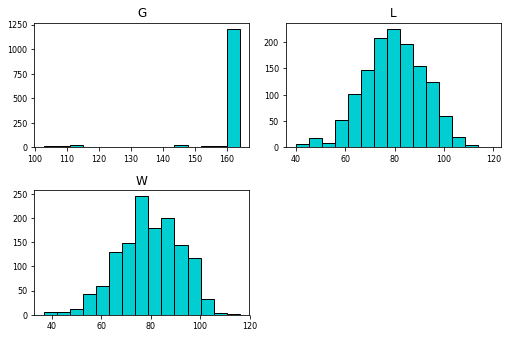

In [16]:
infodf.hist(bins=15, color='darkturquoise', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 
plt.show()

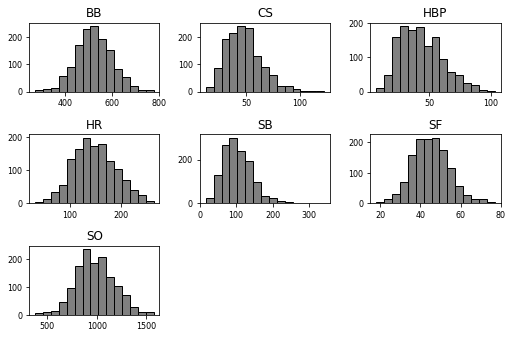

In [17]:
battingdf.hist(bins=15, color='gray', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 
plt.show()

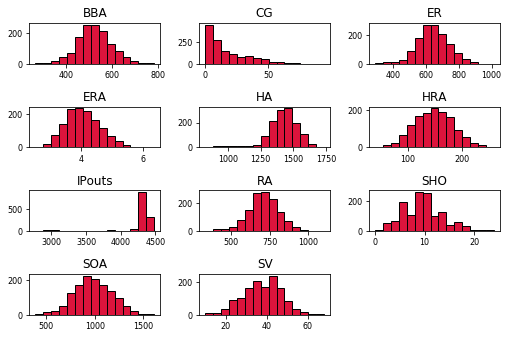

In [18]:
pitchingdf.hist(bins=15, color='crimson', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 
plt.show()

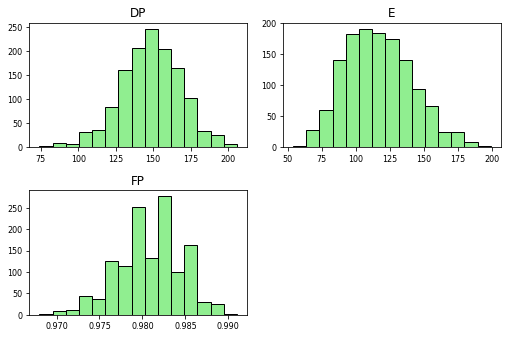

In [19]:
fieldingdf.hist(bins=15, color='lightgreen', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 
plt.show()

Overall, the variables are fairly normally distributed. The variables 'AB' , 'G' , 'H'  are right skewed. These are expected to be right skewed as most teams play around the same number of total games and home games per season. The total number at bat is also right skewed as it is related to the number of games played. The variables 'CG' , '3B' and 'SB' are left skewed. CG, or complete games thrown by the pitcher, is expected to be left skewed as it is rare for a pitcher to throw a complete game. '3B's, or total triples, are harder than a single or double and as a result, less common. The same logic is true for stolen bases. The boxplots for the variables are shown below.

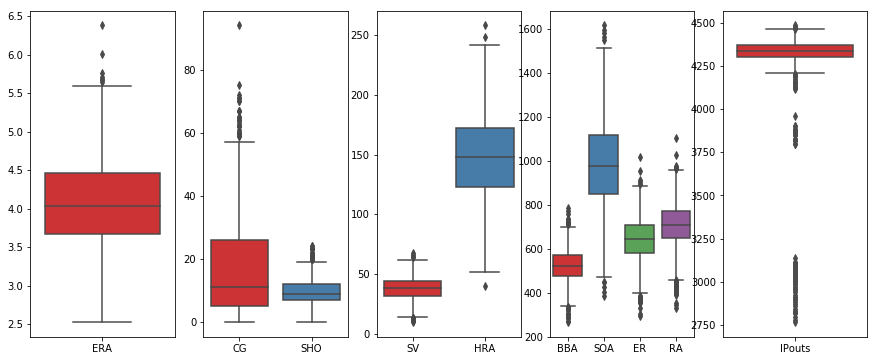

In [20]:
fig, ax =plt.subplots(1,5, figsize=(15,6))
sns.boxplot(data=pitchingdf[['ERA']], palette="Set1", ax=ax[0])
sns.boxplot(data=pitchingdf[['CG' , 'SHO']], palette="Set1", ax=ax[1])
sns.boxplot(data=pitchingdf[['SV', 'HRA']], palette="Set1", ax=ax[2])
sns.boxplot(data=pitchingdf[['BBA', 'SOA', 'ER', 'RA']], palette="Set1", ax=ax[3])
sns.boxplot(data=pitchingdf[['IPouts']], palette="Set1", ax=ax[4])
plt.show()

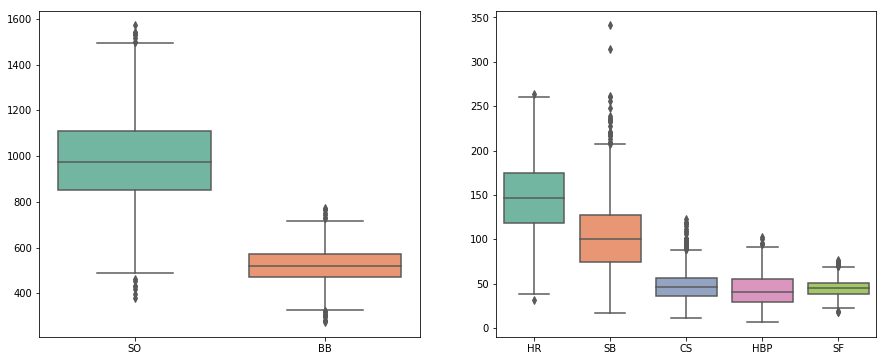

In [21]:
fig, ax =plt.subplots(1,2, figsize=(15,6))
sns.boxplot(data=battingdf[['SO', 'BB']], palette="Set2", ax=ax[0])
sns.boxplot(data=battingdf[['HR', 'SB', 'CS', 'HBP', 'SF']], palette="Set2", ax=ax[1])
plt.show()

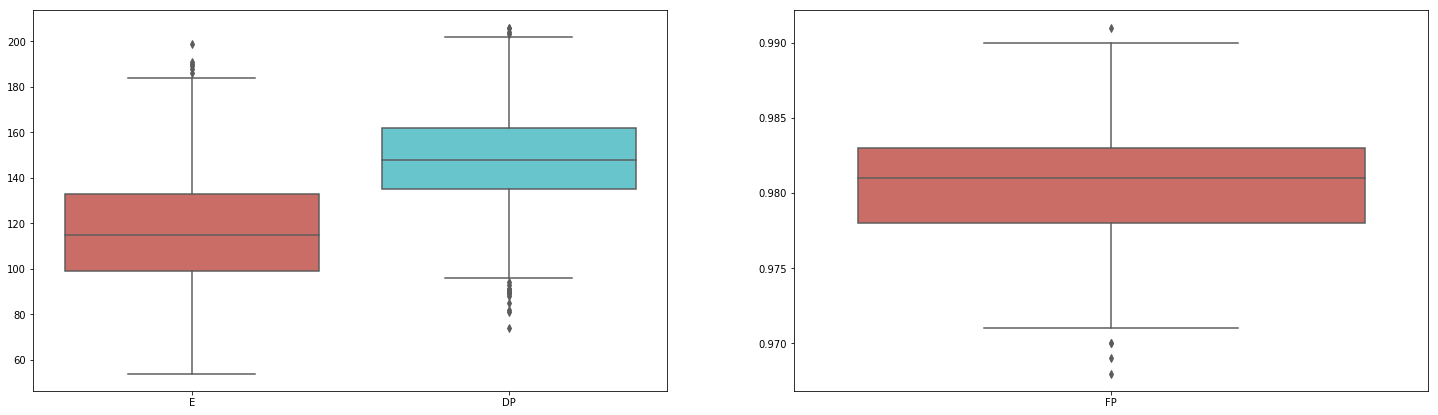

In [22]:
fig, ax =plt.subplots(1,2, figsize=(25,7))
sns.boxplot(data=fieldingdf[['E', 'DP']], palette = 'hls', ax=ax[0])
sns.boxplot(data=fieldingdf[['FP']], palette = 'hls', ax=ax[1])
plt.show()

## Visualize Attributes

#### A Closer Look into Some of the Attributes

The following section takes a closer look into the variables 'attendance', 'payroll' , 'KBB', 'Bavg' and 'KAB'. The variables represent the total home game attendance, the total payroll amount for each team, the strikeout to walk ratio, the team batting average, and the team strikeout per at bat ratio respectively. These variables were analyzed because they potentially will play a big role in predicting whether or not a team will make the playoffs. As a result, we wanted to get a sense of the distributions, statistical summary, and/or trends in the variable.  

### Attendance

In [23]:
teams2Plus['attendance'].describe()

count      1324.00
mean    2049799.53
std      792309.99
min      306763.00
25%     1439223.75
50%     2001874.50
75%     2588625.00
max     4483350.00
Name: attendance, dtype: float64

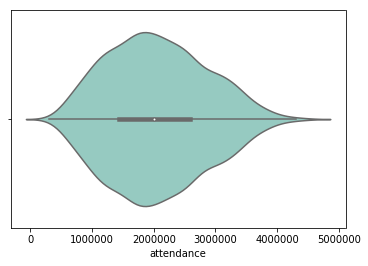

In [24]:
sns.violinplot(x=teams2["attendance"], palette = 'Set3')
plt.show()

The violin plot for total home game attendance is shown above. As shown in the plot, attendance is fairly normally distributed however, there does seem to be a significant range between the max and min attendance totals. The median total attendance number is around 2,000,000 fans in attendance. The max occurances of 4,000,000+ are most likely due to long play off runs and bigger stadiums. The min occurances of less than 1,000,000 could be due to bad weather or outside factors. The extreme observations do not seem to skew the data significantly overall, so attendance could potentially be used to predict the playoff status as more people attending usually means the team is performing better.

### Payroll

In [25]:
teams2Plus['salary'].describe()

count         918.00
mean     60042632.63
std      43309923.78
min        880000.00
25%      25435708.25
50%      50537324.00
75%      84416082.75
max     231978886.00
Name: salary, dtype: float64

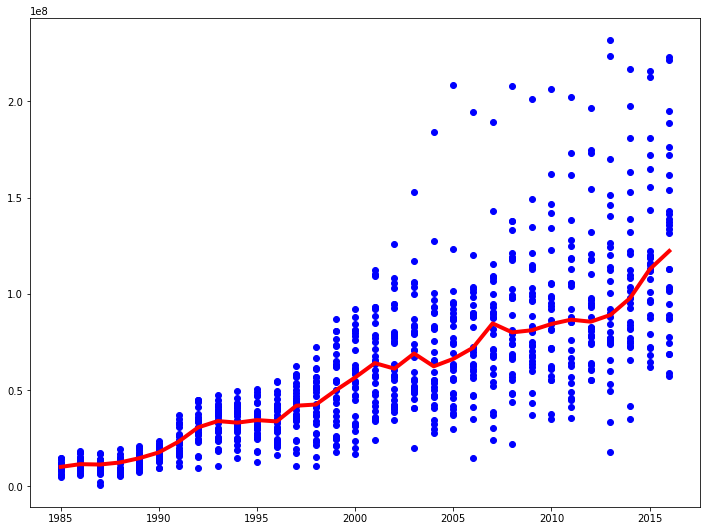

In [26]:
plt.subplots(figsize = (12,9))
plt.scatter(teams2Plus['yearID'], teams2Plus['salary'], color='blue');
plt.plot(teams2Plus.groupby(['yearID'])['salary'].median(), color = 'red', linewidth = 4)
plt.show()

The figure above shows the scatter plot of the total team's payroll plotted against the year. Overall, the payroll amount seems to be increasing between years. However, there does seem to be quite a few team's payrolls that have not increased significantly since 1985. Additionally, the years 1985 through about 1996 do not have a significant range between the max and min payroll amounts. There seems to be a significant increase in payroll ranges in the year 2001 and continues throughout. This may play a significant role in predicting playoff status since generally, the teams that perform the best make the most money.

### Strikeouts to Walks

In [27]:
teams2Plus['KBB'].describe()

count   1324.00
mean       1.91
std        0.45
min        1.03
25%        1.59
50%        1.83
75%        2.17
max        3.98
Name: KBB, dtype: float64

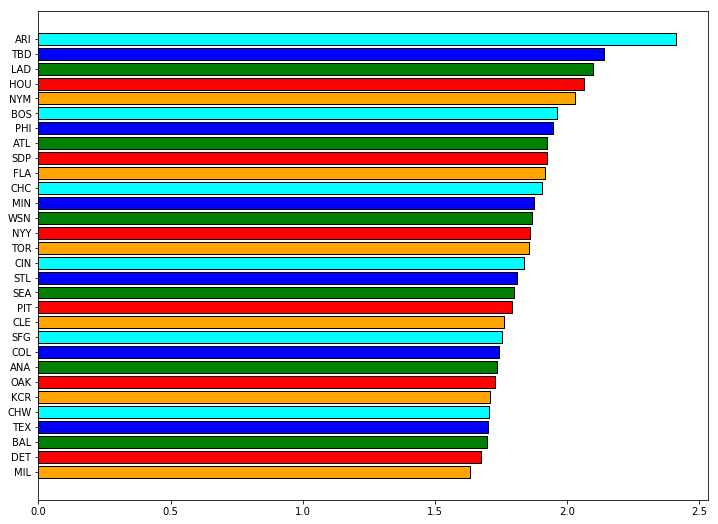

In [28]:
plt.subplots(figsize = (12,9))
pltData = teams2Plus.groupby(['franchID'])['KBB'].median().sort_values()
plt.barh(pltData.index, pltData, color=['orange', 'red', 'green', 'blue', 'cyan'], edgecolor='black')

plt.show()

### Team Batting Average

In [29]:
teams2Plus["Bavg"].describe()

count   1324.00
mean       0.26
std        0.01
min        0.22
25%        0.25
50%        0.26
75%        0.27
max        0.29
Name: Bavg, dtype: float64

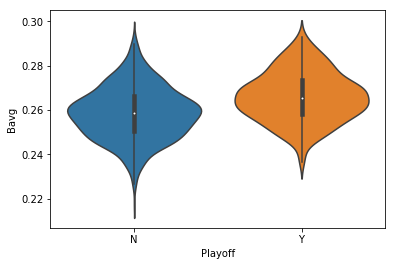

In [30]:
sns.violinplot(x =teams2Plus["Playoff"] ,y = teams2Plus["Bavg"], scale_hue=False)
plt.show()

The violin plot for batting average is shown below for teams that made the playoffs and teams that did not make the playoffs. Overall, the distributions are normal. As expected, the team batting average is higher for teams that made the playoffs versus the teams that did not make the playoffs. The teams that made the playoffs had a batting average of about 0.27 safe hits per time at bat. The teams that did not make the playoffs had a batting average of about 0.26 safe hits per time at bat. Since the batting average is higher for those that made the playoffs, it is very likely that this will be used to predict playoff status.

### Team Strikeouts per at Bat

In [31]:
teams2Plus["KAB"].describe()

count   1324.00
mean       0.18
std        0.03
min        0.10
25%        0.16
50%        0.18
75%        0.20
max        0.29
Name: KAB, dtype: float64

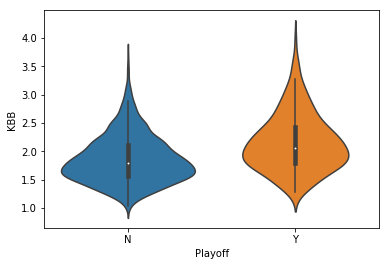

In [32]:
sns.violinplot(x =teams2Plus["Playoff"] ,y = teams2Plus["KBB"], scale_hue=False)
plt.show()

The violin plot for team strikeouts per at bat is shown above. The strikeouts per at bat should be closely related to the batting average from above as more strikeouts should lower the batting average. The distributions for both the playoff teams and nonplayoff teams are left skewed. Surprisingly, the playoff teams actually have a greater KBB ratio than teams not in the playoffs. 

------
## Explore Joint Attributes

### Attribute Correlation

A degree of correlation is expected in this data set. Many of the statistics are products or factors of certain base statistics. For instance, earned run average (ERA) is earned runs divided by innings pitched. 
The attribute correlation matrix below provides an excellent visual representation of correlation between variables within the Teams dataset.  In the table below are the top 15 positive and negatively correlated pairs of attributes.   
Some highly positively correlated pairs are:

| Correlation Parameters | Attributes | Correlation |
|---------------------------------|---------------|-----------------|
| Runs Allowed – Earned Runs | RA – ER | 0.99 |
| Total outs Pitched - # of Games played | IPouts – G | 0.99 |
| Earned Runs Surrendered – Home Runs Allowed | ER – HRA | 0.80 |   


Some of these correlations are ‘no-brainers’. Runs allowed is very highly correlated with Earned runs, the only difference being RA is EA + unearned runs (runs due to errors).  Same can be said about IPouts vs G.  It goes without saying the total outs pitched would be highly correlated with the number of games played, the only differences being extra-inning games.

Some highly negatively correlated pairs are: 

| Correlation Parameters | Attributes | Correlation |
|---------------------------------|---------------|-----------------|
| Fielding Percentage – Total Errors | FP – E | -0.94 |
| Games Lost – Games won | L – W | -0.63 |
| Complete Games pitched – Team hitters hit by Pitch | CG – HBP | -0.51 |   


Again, many of these correlations are ‘no-brainers’. It should go without saying that number of losses is negatively correlated with the number of wins. Fielding Percentage (percentage of times a player properly handles a ball) is virtually opposite of Errors (mishandled balls).  One correlation that was not as apparent was the correlation of complete games pitched vs teams’ hitters hit by pitch.  It makes sense that pitchers, if they hit batters, will probably get pulled from the game before they pitch a complete game.

Reviewing the attribute correlations, both positive and negative, will assist in eliminating redundant and unnecessary attributes when building predictive analysis models using this dataset.
  

In [33]:
#Numeric Corr
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "6pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

teams2Numeric = teams2.select_dtypes(exclude=['object'])
teamCorrMat = teams2Numeric.corr()
teamCorrMat.style.background_gradient(sns.diverging_palette(5, 250, as_cmap=True), axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '1pt'})\
    .set_caption("Numeric Variable Correlation Heatmap")\
    .set_precision(2)\
    .set_table_styles(magnify())

A comparison of the most-correlated variables (positive and negative), shows that higher absolute correlations tend to be positively correlated; there are fifteen variable pairs with positive correlation of 0.8 or greater, while in contrast only two pairs of variables have negative correlation over 0.8.

In [34]:
# Highest Correlation Pairs
corrPairs = teamCorrMat.unstack().sort_values(kind="quicksort")
#- REMOVE DUPLICATES
corrPairs = corrPairs[::2]
corrPairs = corrPairs[corrPairs.index.get_level_values(0) != corrPairs.index.get_level_values(1)]
with pd.option_context('display.max_rows',32):
    print(corrPairs)

FP      E        -0.94
yearID  CG       -0.83
Rank    W        -0.77
ERA     SHO      -0.67
L       W        -0.63
yearID  E        -0.63
CG      SO       -0.59
        SOA      -0.55
SHO     RA       -0.55
        ER       -0.55
CG      HBP      -0.51
        2B       -0.50
        HRA      -0.50
        SV       -0.50
FP      CG       -0.49
CS      yearID   -0.48
                  ... 
Rank    L         0.78
ER      HRA       0.80
H       R         0.83
ER      HA        0.83
H       AB        0.84
RA      HA        0.85
ERA     RA        0.88
ER      ERA       0.90
AB      Ghome     0.96
        IPouts    0.97
Ghome   IPouts    0.97
AB      G         0.98
BPF     PPF       0.98
Ghome   G         0.98
RA      ER        0.99
IPouts  G         0.99
Length: 595, dtype: float64


### Home Runs Over Time

Who doesn't love home runs? They are one of the most exciting things about baseball. Every fan dreams of one day catching a home-run ball hit by their favorite player. And being such an exciting part of the game, we wanted to examine how the prevalence of home runs has changed over the years.

The below plot shows the annual median rate of home runs per at bat for each league going back to 1970. It clearly illustrates the variability of home runs over the years and highlights some interesting features:
* Though the home run rate between the two leagues tends to fluctuate together, the America League (AL) tends to have a higher rate of home runs compared to the National League (NL). This is to be expected given that the American League allows for designated hitters to bat in place of pitchers so we would expect the AL to have more home runs.


* The “Steroid Era“ (highlighted in green) is clearly visible. The Steroid Era was a period in Major League Baseball when offensive production—especially home runs—spiked considerably. Many of the top names in baseball at the time were racing to set new records (e.g., Mark McGwire, Barry Bonds), and it is commonly thought that performance enhancing drugs (PED) played a large role in this increased offence given the era its name. The MLB “officially” banned PEDs in 1991, however actual testing didn’t start until 2003 (a year in which the upward trajectory in offensive production stopped abruptly)


* The “Rabbit Ball” conspiracy of the mid 80’s is a time when some people contend that the MLB purposely change the baseballs used in games making them lighter and bouncier. Something referred to as “juicing” the baseball. These claims have never been proven, but the area highlighted in yellow below clearly shows a significant increase in the rate of home runs followed by a steep drop off.


* Current ball juicing?  There have been rumors floating around in the last couple of year suggesting that MLB has again changed the baseball used in games to make the fly further. After a couple of seasons of offensive decline, there was a sudden spike in the home run rate following the 2015 all-star break. The changes have not been officially confirmed, but there have been analyses done showing a reduction in the density of MLB baseballs between 2014 and 2015.


In [35]:
teams2Plus.HRAB.describe()

count   1324.00
mean       0.03
std        0.01
min        0.01
25%        0.02
50%        0.03
75%        0.03
max        0.05
Name: HRAB, dtype: float64

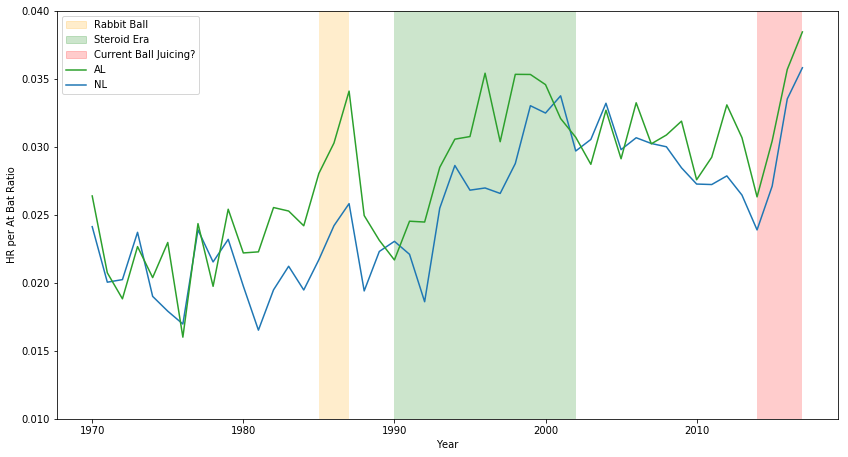

In [36]:
# Visualize Stats over time
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

hrPlotDat = teams2Plus
hrPlotDat = pd.DataFrame({
    'NL' : teams2Plus[teams2Plus.lgID == "NL"].groupby(['yearID'])['HRAB'].median() ,
    'AL' : teams2Plus[teams2Plus.lgID == "AL"].groupby(['yearID'])['HRAB'].median() 
})
hrPlotDat['year'] = hrPlotDat.index

fig, ax = plt.subplots(1, 1, figsize=(14, 7.5))
ax.set_ylim(0.01, 0.04)
ax.fill_between(hrPlotDat.year,0, 1, where=(hrPlotDat['year'] >= 1985) & (hrPlotDat['year'] < 1988), facecolor='orange', alpha=0.2)
ax.fill_between(hrPlotDat.year,0, 1, where=(hrPlotDat['year'] >= 1990) & (hrPlotDat['year'] < 2003), facecolor='green', alpha=0.2)
ax.fill_between(hrPlotDat.year,0, 1, where=hrPlotDat['year'] >= 2014, facecolor='red', alpha=0.2)

legendColRabbit = mpatches.Patch(color='orange', label='Rabbit Ball', alpha = 0.2)
legendColRoid = mpatches.Patch(color='green', label='Steroid Era', alpha = 0.2)
legendColUkn = mpatches.Patch(color='Red', label='Current Ball Juicing?', alpha = 0.2)
legendLineAL = mlines.Line2D([], [], color="#1f77b4", label='NL')
legendLineNL = mlines.Line2D([], [], color="#2ca02c", label='AL')

plt.plot('year', 'NL', data = hrPlotDat, label="NL", color = "#1f77b4")
plt.plot('year', 'AL', data = hrPlotDat, label="AL", color = "#2ca02c")
plt.ylabel('HR per At Bat Ratio')
plt.xlabel('Year')
#plt.legend( prop={'size': 20})
plt.legend(handles=[legendColRabbit, legendColRoid, legendColUkn, legendLineNL, legendLineAL])
plt.show()

#### What could be the cause of the current spike in the rate of home runs?

One explanation (other than a juiced ball) suggested for the increase in home runs over the last few years is that there has been a shift in betting mentality in the MLB. The theory suggests that batters are shifting their preferences towards hits and making contact over walks. To test this, we first looked at the relationship between the home-run rate and strikeout rate, as well as the strikeout to walk ratio. The plots below show the relationship for each respectively, and they each suggest that an increasing in the home-run rate does appear to be related to an increase in the strikeouts.

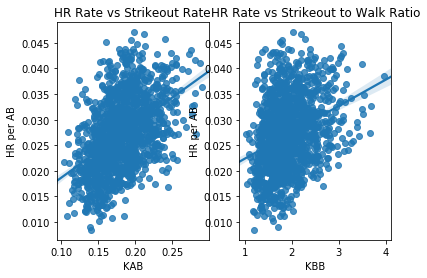

In [37]:
# Side by side
plt.subplot(1, 2, 1)
# HRR vs KAB
sns.regplot(data=teams2Plus, y="HRAB", x='KAB')
plt.title('HR Rate vs Strikeout Rate')
plt.ylabel('HR per AB')
plt.xlabel('KAB')

# HRR vs 
plt.subplot(1, 2, 2)
sns.regplot(data=teams2Plus, y="HRAB", x='KBB')
plt.title('HR Rate vs Strikeout to Walk Ratio')
plt.ylabel('HR per AB')
plt.xlabel('KBB')

plt.rcParams["figure.figsize"] = [20, 10]

plt.show()


When we look at the changes in these attributes over time, we see that KAB and KBB have been steadily increasing over the last decade (potentially confirming the change in batter mentality). However, the home-run rate over that same period has not been steadily increasing along with those attributes. The home-run rate has only spiked recently suggesting that there is more to the increased number of home runs other than batters swinging more often.

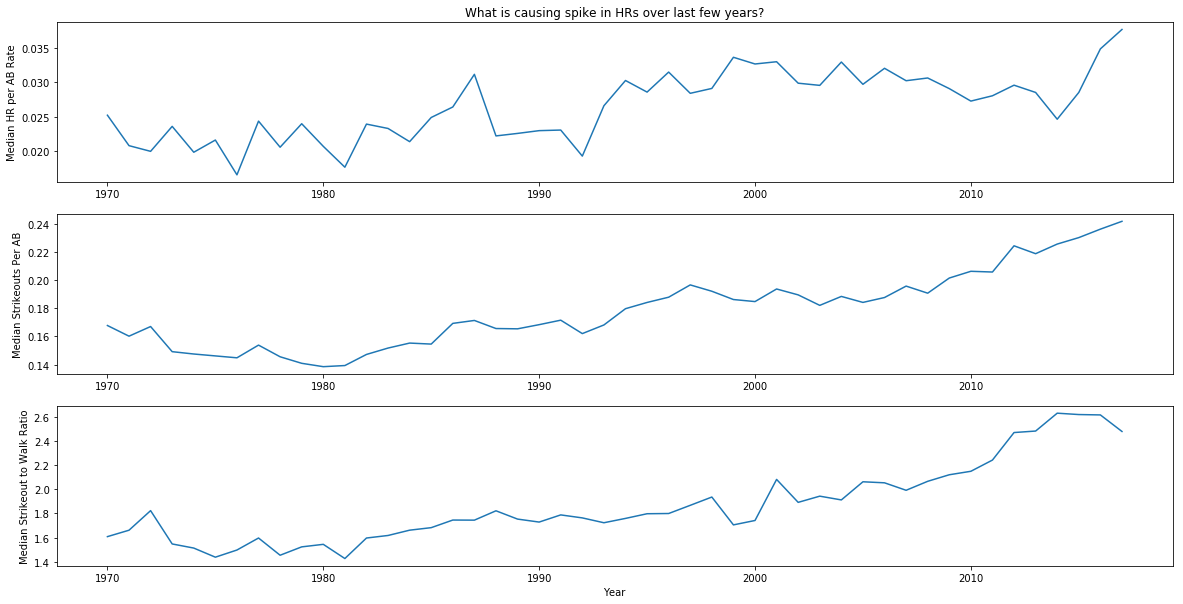

In [38]:
hrPlotDat = pd.DataFrame({
    'HR_per_AB' : teams2Plus.groupby(['yearID'])['HRAB'].median() ,
    'K_per_AB' : teams2Plus.groupby(['yearID'])['KAB'].median(),
    'KBB' : teams2Plus.groupby(['yearID'])['KBB'].median() 
})
hrPlotDat['year'] = hrPlotDat.index

# Plot1
plt.subplot(3, 1, 1)
plt.title('What is causing spike in HRs over last few years?')
plt.plot('year', 'HR_per_AB', data = hrPlotDat)
plt.ylabel('Median HR per AB Rate')

# Plot1
plt.subplot(3, 1, 2)
plt.plot('year', 'K_per_AB', data = hrPlotDat)
plt.ylabel('Median Strikeouts Per AB')

# Plot1
plt.subplot(3, 1, 3)
plt.plot('year', 'KBB', data = hrPlotDat)
plt.xlabel('Year')
plt.ylabel('Median Strikeout to Walk Ratio')

# Figure-Level Settings
plt.rcParams["figure.figsize"] = [12, 9]
plt.show()

### Payrolls between Teams and Playoff Status

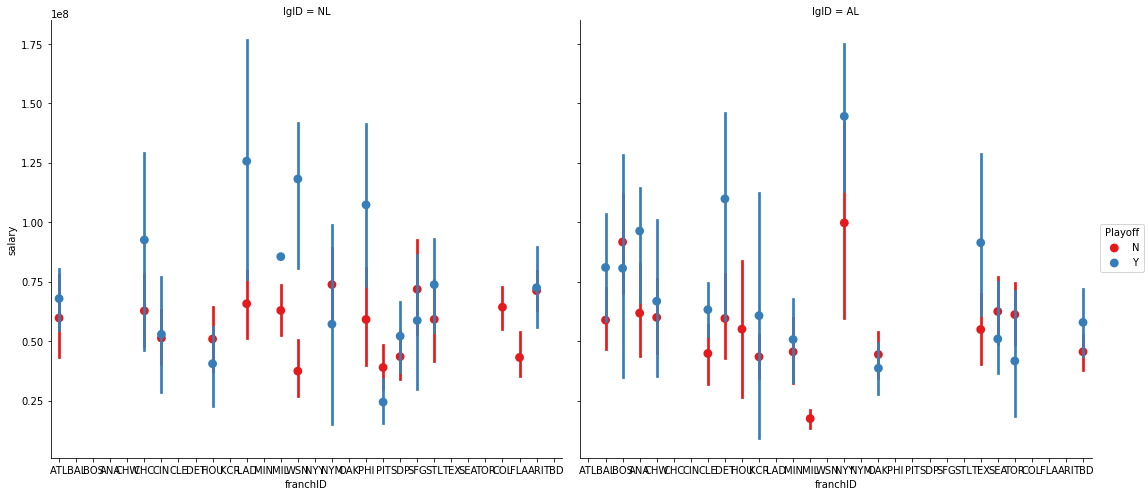

In [39]:
sns.factorplot(x="franchID", y="salary", hue="Playoff", col="lgID", data=teams2Plus, join= False , palette="Set1",size=7, aspect=1.1)
plt.show()

From the plots above, it does not seem as though there is a significant relationship between whether or not a team made the playoffs and the total team payroll. The American League does not have a big difference in salaries overall. The National League seems to have a bigger difference in salaries between teams however, the total team payroll does not seem to play a significant factor in playoff status. 

------

## Explore Attributes and Class

The goal of this section is to identify and explain interesting relationships between features and a response variable. Two clear use cases from the team level data would be to utilize the available attributes to predict the number of wins a team will accumulate in the regular season and whether or not a team will make the playoffs. This section will examine various batting and pitching statistics to determine their relationship between these two outcomes. Batting statistics to be explored are Team Batting Average, Home Runs, Slugging Percentage, OPS and Strikeouts. The attributes mentioned above will be visually evaluated to assess their respective relationship on Wins and qualification for the playoffs.

### Batting Statistics and Wins

,Corr Coef,P Value,Statistic
0,0.35,0.00,Batting Avg
1,0.39,0.00,Home Runs
2,0.38,0.00,Slugging Pct
3,0.43,0.00,OPS
4,0.12,0.00,Strike Outs


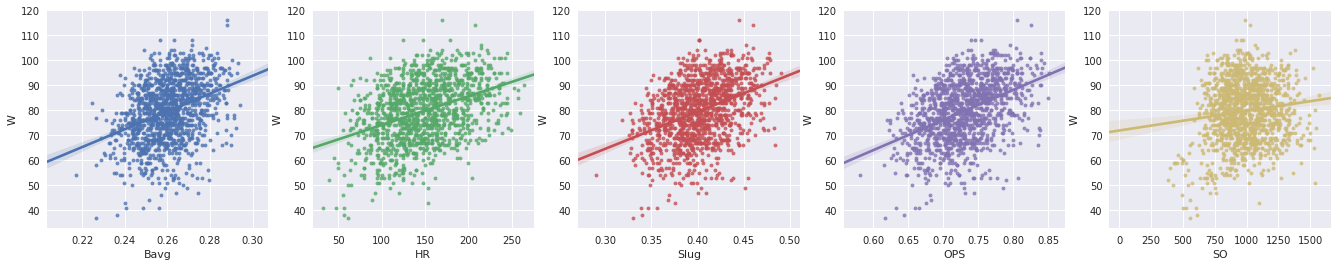

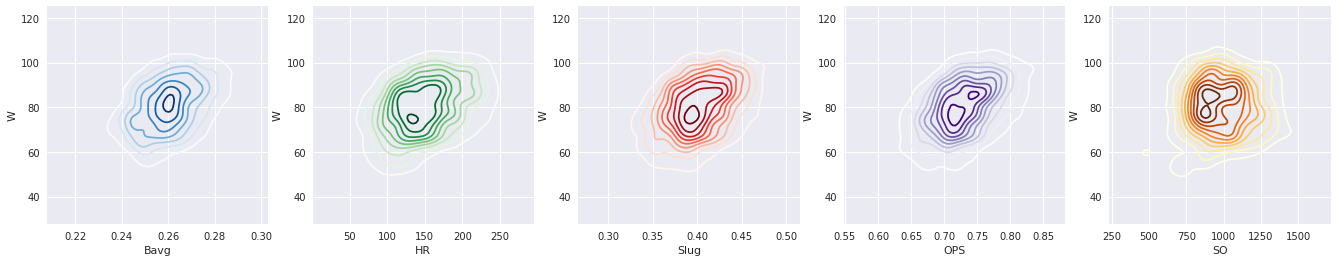

In [40]:
from scipy.stats.stats import pearsonr
sns.set(style='darkgrid')

#Create Scatter Plots to show the relationship between the aforementioned Batting Statistics, Wins.
i = 0
battstat = ['Bavg', 'HR', 'Slug', 'OPS', 'SO']
colList = ['Blues', 'Greens', 'Reds', 'Purples', 'YlOrBr']

f, axes = plt.subplots(1, 5, figsize=(23,4))

for b in battstat:
    sns.regplot(data=teams2Plus, x=b, y='W', scatter_kws={'s':15}, ax=axes[i])
    i = i + 1

#Kernel Density Estimates
i = 0
f, axes = plt.subplots(1, 5, figsize=(23,4))

for b in battstat:
    sns.kdeplot(teams2Plus[b], teams2Plus.W, ax=axes[i], cmap=colList[i])
    i = i + 1

#Calculate and Display Correlation Coefficients
prdf = []
prlist = [teams2Plus.Bavg, teams2Plus.HR, teams2Plus.Slug, teams2Plus.OPS, teams2Plus.SO]
labels = ['Batting Avg', 'Home Runs', 'Slugging Pct', 'OPS', 'Strike Outs']
l=0

for p in prlist:
    prdf.append({'Statistic': labels[l], 'Corr Coef': pearsonr(p, teams2Plus.W)[0], 'P Value': pearsonr(p, teams2Plus.W)[1]})
    l = l + 1

prdf = pd.DataFrame(prdf)
prdf

To analyze the impact Batting Average, Home Runs, Slugging Percentage, OPS and Strikeouts have on Wins, scatter plots, kernel density estimates and Correlation Coefficients were created. The plots and correlation coefficients are all shown above. All output shows Batting Average, Home Runs, Slugging Percentage and OPS have a positive correlation with the number of wins in a season. At a level of significance of 0.05, all correlation coefficients are statistically significant. With a correlation coefficient of approximately 0.43, OPS has the highest correlation with the number of wins. Strike Outs has the lower correlation (0.12). While this figure does show as being statistically significant, the low correlation value suggests the correlation is not strong. The number of strike outs may not have a practically significant impact on the number of Wins. Current baseball strategy favors getting on base and hitting home runs as the route to winning the most games. While not a complete hypothesis test, the charts and graphs presented above seem to coincide with that statement. Furthermore, the Houston Astros have a well-known strategy of risking strike outs in exchange for a big hit. The strike out charts and figures seem to suggest this may be a prudent situational strategy. Finally, the Kernel Density Estimates echo the same pattern as the scatter plots. But, the topography also illustrates the relative normality of the distribution of the batting statistics presented above.

### Batting Statistics and Playoffs

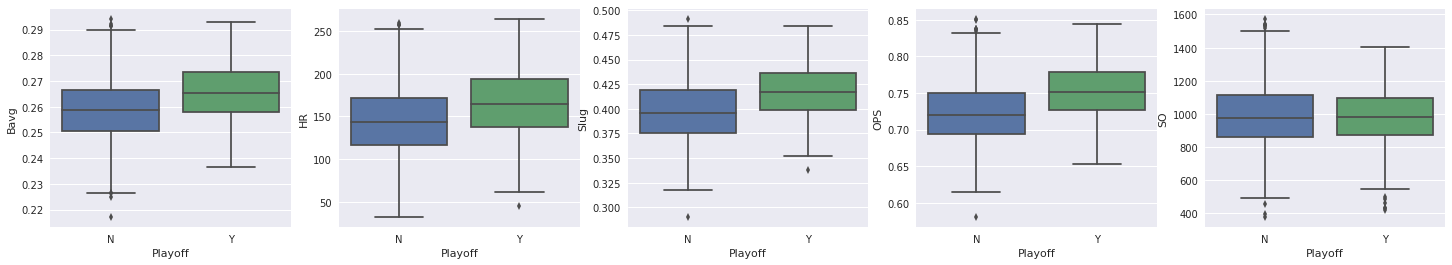

In [41]:
f, axes = plt.subplots(1, 5, figsize=(25,4))

i = 0
battstat = ['Bavg', 'HR', 'Slug', 'OPS', 'SO']

for b in battstat:
    sns.boxplot(data=teams2Plus, x='Playoff', y=b, ax=axes[i])
    i = i + 1

The box plots above graphically illustrate the difference in median values and quartile ranges compared to the scale of batting statistic being compared. It is interesting to note all inter-quartile ranges overlap. In most cases, the median lines of the two playoff values do not stray outside of the boundaries of the others inter-quartile range box. This illustrates how thin, on the average, the margin can be between teams who make the playoffs and those who are left out. Similar to the Batting Statistics and Wins analysis, OPS (fourth chart from the fight) seems to be the biggest differentiator between teams who make the playoffs and those who do not. This is evidenced by the median value line of playoff equal to Y (the green box) appearing to reside outside of the inter-quartile range of the blue box (playoff equal to N). There appears to be very little difference in strike outs between teams who do and do not make the playoffs. Finally, one trend which is consistent across all box plots shown above is the playoff teams have a tighter distribution of for each of the categories presented above. This suggests playoff teams could be more consistent, on average, than non-playoff teams.

------

## Exceptional Work

A significant amount of effort was expended verifying data quality, researching and implementing new features. This could be considered exceptional work. In addition to this effort, the output of the data quality and new features sections will be used to test a simple logistic regression model to determine if the data set can be used to predict which teams make the playoffs in the 2017 season. Obviously, this is in the past. The Lahman baseball database does not yet contain 2018 data. So, special attention was paid to not let past events leak into the model. For instance, there are indicators in the base data set which tell us if the team made the playoffs and how far they advanced. These columns will be removed. The number of wins is also in the data set. This could easily be considered a form of leakage as well. However, if the model was applied to a season in progress, the number of wins would likely be the key contributor to whether or not a team qualifies for the playoffs. Thus, wins will remain in the model.

### Logistic Regression Model to Predict Playoff Status

Pre-model fit steps include transforming the Yes / No Playoff flag into a 1, 0 indicator. Additionally, columns which introduce leakage, near zero variance and categorical attributes with no impact on predictive modeling are removed from the data set. The remaining columns can be seen below.

In [42]:
#Remove attributes which input leakage, near zero variance and categorical attributes with no impact
teams2Plus.Playoff.replace(('Y', 'N'), (1, 0), inplace=True)

teams2Plus = teams2Plus[['yearID', 'franchID', 'Rank', 'W', 'L', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG','SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP','attendance', 'BPF', 'PPF', 'WHIP', 'KBB', 'KAB', 'Bavg','Slug', 'OBP', 'OPS', 'Playoff']]
teams2Plus.head()

,yearID,franchID,Rank,W,L,R,AB,H,2B,3B,...,BPF,PPF,WHIP,KBB,KAB,Bavg,Slug,OBP,OPS,Playoff
0,1970,ATL,5,76,86,736,5546,1495,215,24,...,106,106,1.35,2.01,0.13,0.27,0.40,0.33,0.74,0.00
1,1970,BAL,1,108,54,792,5545,1424,213,25,...,101,98,1.21,2.01,0.17,0.26,0.40,0.34,0.75,1.00
2,1970,BOS,3,87,75,786,5535,1450,252,28,...,108,107,1.37,1.69,0.15,0.26,0.43,0.34,0.76,0.00
3,1970,ANA,3,86,76,631,5532,1391,197,40,...,96,97,1.26,1.65,0.17,0.25,0.36,0.31,0.67,0.00
4,1970,CHW,6,56,106,633,5514,1394,192,20,...,101,102,1.48,1.37,0.16,0.25,0.36,0.31,0.68,0.00


------
A logistic regression model built using R is invoked to run the predictive model. For variable selection and reduction, forward, backward and stepwise processes where run. The output from the backward variable selection process was used as the base for the model. This model was manually refined using personal knowledge about the game of baseball, AIC and VIF results. The final model can be seen below.

------

In [43]:
%load_ext rpy2.ipython

%R library(tidyverse); library(caret); library(car)

array(['car', 'caret', 'lattice', 'forcats', 'stringr', 'dplyr', 'purrr',
       'readr', 'tidyr', 'tibble', 'ggplot2', 'tidyverse', 'tools',
       'RevoUtils', 'stats', 'graphics', 'grDevices', 'utils', 'datasets',
       'RevoUtilsMath', 'methods', 'base'], dtype='<U13')

In [44]:
%%R -i teams2Plus

str(teams2Plus)

df.Teams2Train <- teams2Plus
df.Teams2Test <- subset(df.Teams2Train, yearID==2017)

#Null columns to be predicted in test data set
df.Teams2Test$Playoff <- '.'

#Variable Selection
fit.forward <- glm(Playoff ~ 1, data = df.Teams2Train, family = binomial)
fit.backward <- glm(Playoff ~ ., data = df.Teams2Train, family = binomial)
step(fit.forward, scope = formula(fit.backward), direction = 'forward', k=2)
#forward result = Playoff ~ Rank + ERA + attendance + KAB + HR | AIC 192.8
step(fit.backward, direction = 'backward', k=2)
#backward result = Playoff ~ Rank + W + L + AB + H + X2B + X3B + HR + BB + SO + HBP + SF + E + FP + KAB + Slug + OBP | AIC = 120.9 
step(fit.forward, scope = list(upper=fit.backward), data=df.Teams2Train, direction="both", k=2)
#stepwise result = Playoff ~ Rank + ERA + attendance + KAB + HR | AIC 192.8

#Fit the logistic Regression Model
fit.train <- glm(Playoff ~ Rank + W + AB + H + X2B + X3B + HR + BB + SO + FP + OPS + RA, data = df.Teams2Train, family = binomial)
#car::vif(fit.train)
summary(fit.train)

#Prediction
df.Teams2Test$Prob <- predict(fit.train, type = 'response', newdata = df.Teams2Test, terms = 'franchID')
df.Predict <- subset(df.Teams2Test, select = c(franchID, Prob))
df.Predict <- arrange(df.Predict, desc(Prob))

'data.frame':	1324 obs. of  42 variables:
 $ yearID    : int  1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 ...
 $ franchID  : chr  "ATL" "BAL" "BOS" "ANA" ...
 $ Rank      : int  5 1 3 3 6 2 1 5 4 4 ...
 $ W         : int  76 108 87 86 56 84 102 76 79 79 ...
 $ L         : int  86 54 75 76 106 78 60 86 83 83 ...
 $ R         : int  736 792 786 631 633 806 775 649 666 744 ...
 $ AB        : int  5546 5545 5535 5532 5514 5491 5540 5463 5377 5574 ...
 $ H         : int  1495 1424 1450 1391 1394 1424 1498 1358 1282 1446 ...
 $ X2B       : int  215 213 252 197 192 228 253 197 207 250 ...
 $ X3B       : int  24 25 28 40 20 44 45 23 38 47 ...
 $ HR        : int  160 179 203 114 123 179 191 183 148 129 ...
 $ BB        : num  522 717 594 447 477 607 547 503 656 598 ...
 $ SO        : num  736 952 855 922 872 844 984 909 825 911 ...
 $ SB        : num  58 84 50 69 53 39 115 25 29 114 ...
 $ CS        : num  34 39 48 27 33 16 52 36 30 41 ...
 $ HBP       : num  38 44 40 29 42 20 29 37 34 27

------
Ten teams qualify for the playoffs each season. The model correctly predicted nine of the ten participants in Major League Baseball's 2017 post-season. The Milwaukee Brewers, with a probability of 0.0261, were incorrectly chosen. In reality, the Colorado Rockies qualified in their place. This is a good beginning as there are multiple opportunities to tune this model by exploring variable interaction, centering and scaling. Also, the Lahman data set contains many different tables which could be the source of additional features used to increase the accuracy of this logistic model.

------

In [45]:
%%R 
print(head(df.Predict, n=10))

   franchID       Prob
1       CLE 0.99527862
2       HOU 0.99076283
3       LAD 0.99002567
4       WSN 0.98587474
5       CHC 0.95640736
6       BOS 0.91667926
7       NYY 0.08895151
8       ARI 0.06209518
9       MIL 0.02610199
10      MIN 0.01041142
